# Introduction II - Random Number Extraction

# Table of contents

[Executive Summary](#summary)\
1 [Extraction from a Standard Normal Distribution](#extraction)\
2 [Histogram of the Extracted Values](#hist)\
3 [Histogram of the Distribution of the Extracted Values](#norm_hist)\
4 [Comparing Empirical and Theoretical Distribution of the Extracted Values](#compare)\
5 [Normal Fit of the Distribution of the Extracted Values](#fit)\
6 [Jarque-Bera test for Normality](#JB)

# Executive Summary <a name="summary"></a>

The following sections are organized as follows: 
- In Sec. [1](#extraction) we generate $N$ samples from a Standard Normal Distribution (that is, a [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution) with mean $\mu=0$ and standard deviation $\sigma=1$) and visualize the array of extracted values.
- In Sec. [2](#hist) we plot a histogram of the extracted values.
- In Sec. [3](#norm_hist) we plot a histogram of the empirical distribution of the extracted values. 
- In Sec. [4](#compare), we compare the theoretical Standard Normal distribution with the empirical distribution of the extracted values.
- In Sec. [5](#fit) we do a Normal fit to the empirical distribution and compute empirical Skewness and Kurtosis.
- In Sec. [6](#JB) we do Jarque-Bera Normality test to check whether the extracted values are really normally distributed.

### Preliminary Imports

These are our preliminary imports to load functionalities not included in the Python Standard Library

In [1]:
import numpy as np

Plotting functionalities can be imported in the [Matplotlib](https://matplotlib.org/) Python plotting library. Importing only the `pylab` module is standard and will be enough for our examples too.

In [2]:
import matplotlib.pylab as plt

To request inline plots to the Jupyter Notebook engine, we use the following directive:

In [3]:
%matplotlib inline

Statistical functions are defined in `scipy` library

In [4]:
from scipy import stats

Notice in particular the syntax `from scipy import stats`. This is a case of a package `scipy` from which we decide to load only the `stats` module. Then we can access functions defined in `stats` as usual: `stats.functionName()`

# 1. Extraction from a Standard Normal Distribution <a name="extraction"></a>

The Numpy `random` module contains functionalities to generate random samples. By default it uses a [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) pseudo-random number generator ([PRNG](https://www.geeksforgeeks.org/pseudo-random-number-generator-prng/)).

A PRNG is initialized by a _seed_. Once the seed is set, the PRNG will produce always the same random sequence of numbers. For us is thus important to set the seed to have reproducible results (e.g. to check errors in our code). 

In [5]:
seed = np.random.seed(987654321)

The particular value used to set the seed of the PRNG (here 987654321) is subject of research because it has impact on the quality of the random sequence generated by the PRNG (e.g. on its [_period_](https://www.geeksforgeeks.org/pseudo-random-number-generator-prng/), that is the length of the random sequence after which the PRNG starts to repeat itself). Thus, don't change it unless you have a very sound reason to do it.  

Now, we set how many pseudo-random numbers we want to generate: $N=10^5$

In [6]:
N = 100000

To generate the numbers we simply call the `standard_normal` function defined in the `random` module of `Numpy`

In [7]:
z = np.random.standard_normal(N)

We can visualize the extracted values $z$ using the plotting functionalities of the imported [`matplotlib.pylab` module](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.plot.html)

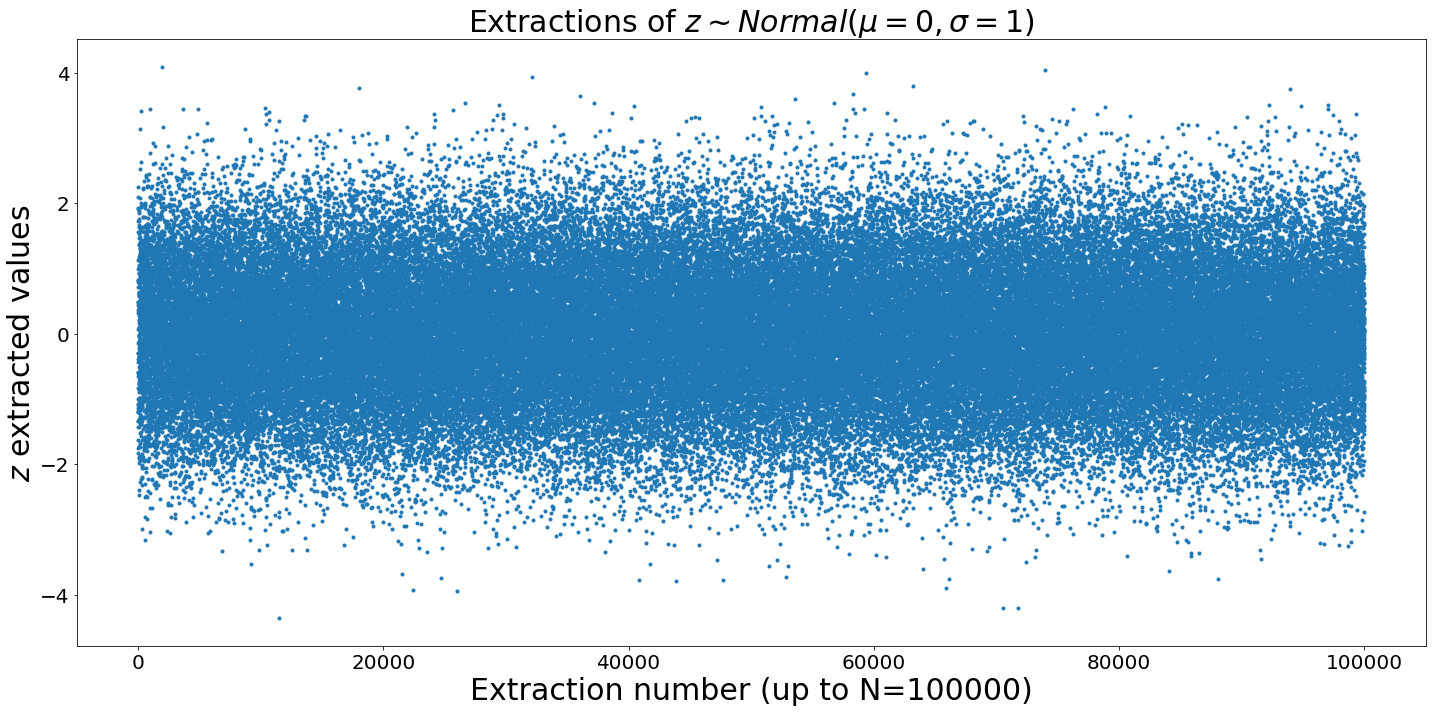

In [8]:
# fig and ax are instances of plot-like objects. 
# These objects have functionalities that allow us to modify/specify features of plot 
# (e.g. the x- and y-axis labels, the title, and so forth...) 
fig, ax = plt.subplots(figsize=(20,10))

# The plot fuction actually draws the plot of z values. 
# The argument 'marker' set the kind of marker of the plot: '.' is for dots markers
# linestyle="" simply avoid the dots to be connected by lines (remove it and re-run and see that the dots become connected)
plt.plot(z, marker='.', linestyle="")

# The ax objects has two sub-objects xaxis and yaxis that give us acces to functionalities of the x-axis and y-axis respctively.
# Here, we set size of the labels of the ticks of the two axis (e.g. 4, 2, 0, -2, -4 for the y-axis).
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

# Here we set the labels of the two axis, providing a text string and the desired size of the font 
ax.set_xlabel('Extraction number (up to N={})'.format(N), fontsize=30) 
ax.set_ylabel('$z$ extracted values', fontsize=30) 

# Here we set the title of the plot
ax.set_title(r'Extractions of $z \sim Normal(\mu=0, \sigma=1)$', fontsize=30) 

# Here we just improve the apperance of the plot, tweaking the spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

By default, `plt.plot(z,...)` plots the values of the $z$ array against its index. That is, against an array of integer values rangin from 0 and ending to `len(z) - 1` (here `len(z) == N`). 

Qualitatively, we see a cloud of points, more dense around 0 and less at greater and smaller values. This is something we expect, since we extracted these values from a Standard Normal Distribution.

# 2. Histogram of the Extracted Values <a name="hist"></a>

Now we draw a histogram of the $z$ values extracted. 

First we set the number of bins, that is the number of intervals in which we partition the extracted values.

In [9]:
num_bins = 50

An histogram will then simply be a plot where:
- on the x-axis there are the extracted values partitioned in bins;
- on the y-axis there are the counts in each bin, that is how many values fall within the range of each single bin

Feel the need to refresh the concept of histogram? This is a good time to do it and [Wikipedia](https://en.wikipedia.org/wiki/Histogram), as always, is there to help. 

We use the [`hist` function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html), provided by the `matplotlib` library, to actually make the plot. 

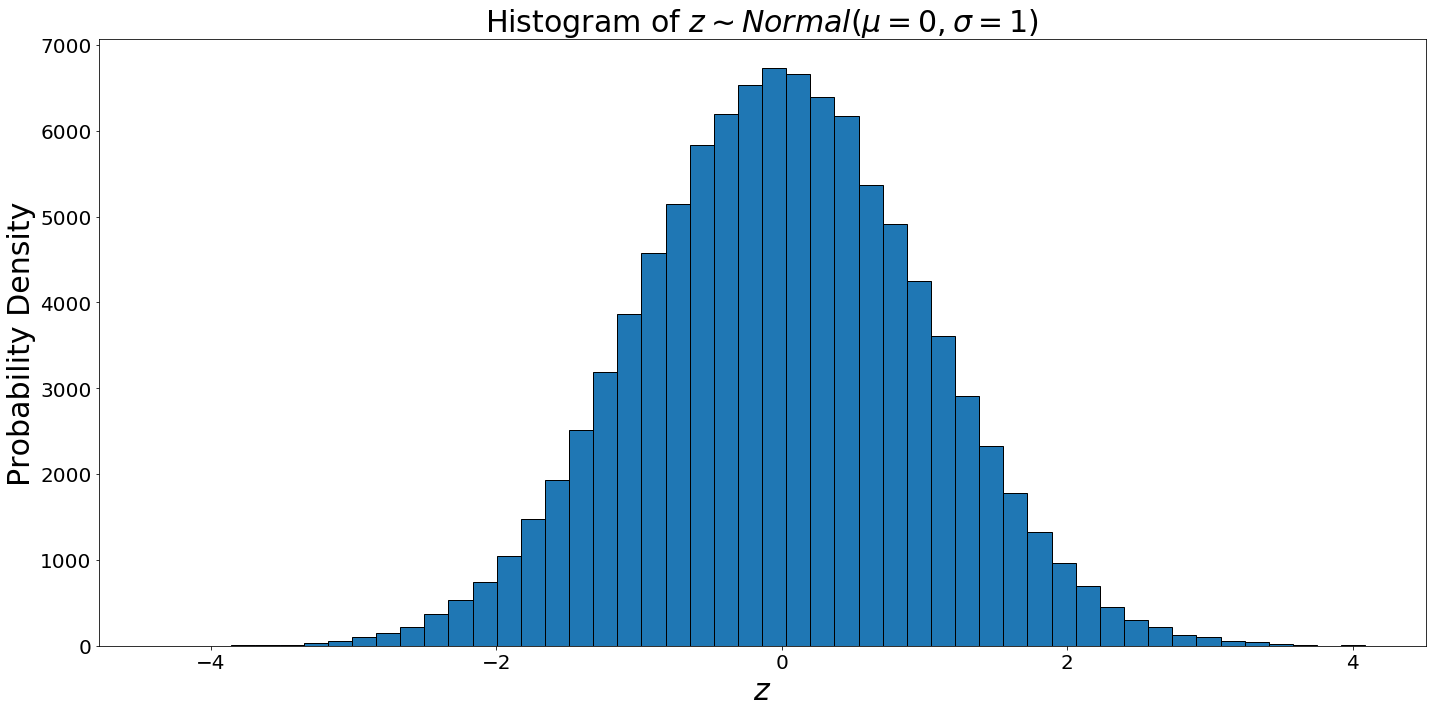

In [10]:
fig, ax = plt.subplots(figsize=(20,10))

# This is the only new piece of code: the histogram of the z values is actually drwan here.
# histtype='bar' simply says that we want an histogram made of (vertical) bars. 
# Different styles can be chosen, take a look at hist's documentation.
# ec='black' simply display in black the borders of the bars.
heights, _, _ = ax.hist(z, num_bins, histtype='bar', ec='black')

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_xlabel('$z$', fontsize=30) 
ax.set_ylabel('Probability Density', fontsize=30) 

ax.set_title(r'Histogram of $z \sim Normal(\mu=0, \sigma=1)$', fontsize=30) 

fig.tight_layout()
plt.show()

To understand the syntax of `heights, _, _ = ax.hist(z, ...)` simply consider that the elements of an array in Python can be assigned directly to variables. For example this can be done:

In [11]:
a, b, c = np.array([10, 20, 30])

print(a)
print(b)
print(c)

10
20
30


Now, function `hist` returns an array of 3 values. We capture the first element only and assign it to the variable `heights` while we skip the capture of the other 2 using the underscores `_` character. This means that the other two outputs of [`hist` function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) will be intentionally lost.

The variable `heights` is itself an array of length `num_bins == 50` representing the _height_ of each single bin. 

How do I know this? Easy! Take a look at _Returns_ section of [`hist` function](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)'s documentation for the meaning of its output and at _Parameters_ section for its arguments.

In [12]:
heights

array([3.000e+00, 0.000e+00, 3.000e+00, 8.000e+00, 6.000e+00, 1.300e+01,
       3.400e+01, 5.400e+01, 1.080e+02, 1.520e+02, 2.180e+02, 3.660e+02,
       5.330e+02, 7.460e+02, 1.041e+03, 1.478e+03, 1.930e+03, 2.519e+03,
       3.187e+03, 3.870e+03, 4.578e+03, 5.150e+03, 5.832e+03, 6.193e+03,
       6.535e+03, 6.728e+03, 6.667e+03, 6.394e+03, 6.170e+03, 5.374e+03,
       4.913e+03, 4.248e+03, 3.614e+03, 2.913e+03, 2.323e+03, 1.778e+03,
       1.326e+03, 9.650e+02, 7.020e+02, 4.560e+02, 3.020e+02, 2.230e+02,
       1.220e+02, 9.800e+01, 5.500e+01, 4.300e+01, 1.900e+01, 4.000e+00,
       2.000e+00, 4.000e+00])

In [13]:
len(heights)

50

Let's label the bins with the index the index $i=0,...,\text{num_bins}-1$ (in our case `num_bins == 50`) and let the array $h_i$ represent the height of bin $i$:

$$h_0, ..., h_{\text{num_bins}-1}$$

By definition of histogram, the sum of the heigts $h_i$ in each single bin $i$ must be equal to the total numbers extracted (in this case `N == 100000`)

$$\text{SUM OF BIN HEIGHTS} = \sum_{i=0}^{\text{num_bins}-1} h_i = N$$

which allow us to legitimately interpret the height of each bin as the counts of $z$ values falling in that bin:

$$h_i : \text{count of the number of $z$ values extracted that fall in the $i$-th bin}$$

Let's check whether this is `True` or `False` using the function `sum`, defined in Numpy:

In [14]:
np.sum(heights) == N

True

Notice the use of the `==` operator which is an operator that check whether the two arguments on its sides are equal. It returns as output a boolean variable `True` or `False`.

# 3. Histogram of the Distribution of the Extracted Values <a name="norm_hist"></a>

Let's now draw a histogram of the empirical distribution of the $z$ values extracted. 

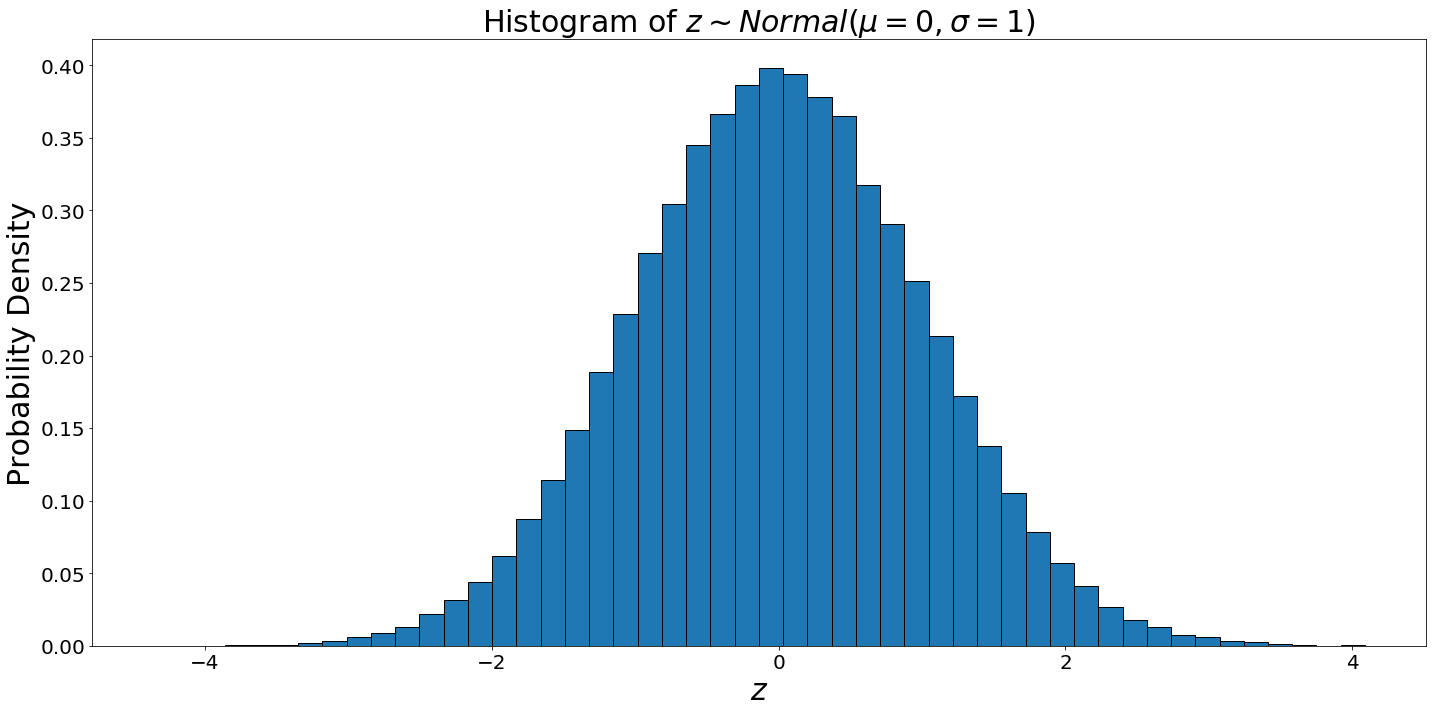

In [15]:
fig, ax = plt.subplots(figsize=(20,10))

# This is the only new piece of code: the normalized histogram of the z values is actually drwan here.
# density=True sepcifies that we want a normalized histogram (see below)
# bin_edges is an array of num_bins + 1 values representing the edges (from left to right) of the bins
heights, bin_edges, _ = ax.hist(z, num_bins, density=True, histtype='bar', ec='black')

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_xlabel('$z$', fontsize=30) 
ax.set_ylabel('Probability Density', fontsize=30) 

ax.set_title(r'Histogram of $z \sim Normal(\mu=0, \sigma=1)$', fontsize=30) 

fig.tight_layout()
plt.show()

We can see that the edges of the bins (wich are automatically chosen by the `hist` function) qualitatively span the range of $z$ values generated (roughly from -4 to 4). 

The second output of `hist` function, captured by `bin_edges` variable, is an array $be_i$ of `num_bins + 1 == 51` values: 

$$be_0, ..., be_{\text{num_bins}}$$

ordered in ascending order. Array $be_i$ represents the edges of the bins ($\text{num_bins}$ left edges and the right edge of last bin). Again, see [`hist` function](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.hist.html)'s documentation for details.

In [16]:
bin_edges

array([-4.36361809, -4.19457925, -4.02554042, -3.85650159, -3.68746276,
       -3.51842393, -3.34938509, -3.18034626, -3.01130743, -2.8422686 ,
       -2.67322977, -2.50419093, -2.3351521 , -2.16611327, -1.99707444,
       -1.82803561, -1.65899677, -1.48995794, -1.32091911, -1.15188028,
       -0.98284145, -0.81380261, -0.64476378, -0.47572495, -0.30668612,
       -0.13764729,  0.03139155,  0.20043038,  0.36946921,  0.53850804,
        0.70754687,  0.87658571,  1.04562454,  1.21466337,  1.3837022 ,
        1.55274103,  1.72177987,  1.8908187 ,  2.05985753,  2.22889636,
        2.39793519,  2.56697402,  2.73601286,  2.90505169,  3.07409052,
        3.24312935,  3.41216818,  3.58120702,  3.75024585,  3.91928468,
        4.08832351])

In [17]:
len(bin_edges)

51

Noticed the parameter `density=True` of `hist`? This specifies that we want a _normalized_ histogram, that is a histogram in which the area under the histogram sums to 1. We can check whether this is true.

Let's define as $bw_i$ the width of the $i$-th bin:

$$ bw_i = be_{i+1} - be_{i}$$

therefore, there will be $\text{num_bins}$ bind widths (as many as the bins of course)

$$bw_0, ..., bw_{\text{num_bins}-1}$$

Bin widths array `bin_widths` can be easily computed in Python _slicing_ the `bin_edges` array:

In [18]:
bin_widths = bin_edges[1:] - bin_edges[:-1]

where:
- `bin_edges[1:]` is a slice of the array `bin_edges` from the 2nd element to the last one
- `bin_edges[:-1]` is a slice of the array `bin_edges` from the 1st element to the next to the last

Take a look at [Numpy Quickstart Tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html#indexing-slicing-and-iterating) for more informations on array indexing and slicing. More on this in a future lesson.

In [19]:
len(bin_widths)

50

In [20]:
bin_widths

array([0.16903883, 0.16903883, 0.16903883, 0.16903883, 0.16903883,
       0.16903883, 0.16903883, 0.16903883, 0.16903883, 0.16903883,
       0.16903883, 0.16903883, 0.16903883, 0.16903883, 0.16903883,
       0.16903883, 0.16903883, 0.16903883, 0.16903883, 0.16903883,
       0.16903883, 0.16903883, 0.16903883, 0.16903883, 0.16903883,
       0.16903883, 0.16903883, 0.16903883, 0.16903883, 0.16903883,
       0.16903883, 0.16903883, 0.16903883, 0.16903883, 0.16903883,
       0.16903883, 0.16903883, 0.16903883, 0.16903883, 0.16903883,
       0.16903883, 0.16903883, 0.16903883, 0.16903883, 0.16903883,
       0.16903883, 0.16903883, 0.16903883, 0.16903883, 0.16903883])

We see that the bins, which are chosen for us by `hist` function, have fixed width.

The normalized histogram condition is:


$$
\text{AREA UNDER HISTOGRAM} = \sum_{i=0}^{\text{num_bins}-1} \text{AREA $i$-th BIN RECTANGLE} \\
= \sum_{i=0}^{\text{num_bins}-1} \text{$i$-th BIN HEIGHT} \times \text{$i$-th BIN BASE}  = \sum_{i=0}^{\text{num_bins}-1} h_i \times bw_i = 1
$$

that in Python is

In [21]:
sum(heights * bin_widths)

1.0000000000000002

# 4. Comparing Empirical and Theoretical Distribution of the Extracted Values <a name="compare"></a>

We now want to compare qualitatively the empirical distribution of $z$, as described by the normalized histogram, with the teoretical distribution from which we have sampled $z$.

We have sampled $z$ from a standard normal distribution, thus the theoretical probability density function $pdf(z)$ of $z$ is the Gaussian bell:
$$
pdf(z) = N(z; \mu=0, \sigma=1) = \frac{1}{\sqrt{2 \pi}} \exp{-\frac{z^2}{2\sigma^2}}
$$

This pdf is implemented in the `stats.norm` module as `pdf` function, which takes in input: 
- the data points over which $pdf(z)$ has to be evaluated 
- the location parameter `loc` for the mean $\mu$
- the scale parameter `scale` for the standard deviation $\sigma$

See [`scipy.stat.norm` documentation](https://docs.scipy.org/doc/scipy-1.3.1/reference/generated/scipy.stats.norm.html) for details on `pdf` and other properties of o normal random variable already implemented in Python (e.g. the cumulative density function, the moments, ...)

For aesthetical reasons only, we evaluate the standard normal `pdf` over a uniformly spaced grid of points ranging between the minimum and maximum extracted values of $z$. We use Numpy function `linspace` to do this. Check [`linspace` documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) for details.

In [22]:
zmin, zmax = min(z), max(z)  
z_unif_grid = np.linspace(zmin, zmax, N)
z_unif_grid

array([-4.36361809, -4.36353357, -4.36344905, ...,  4.08815447,
        4.08823899,  4.08832351])

In [23]:
stdn_pdf_z = stats.norm.pdf(z_unif_grid, loc=0.0, scale=1.0)
stdn_pdf_z

array([2.92532485e-05, 2.92640394e-05, 2.92748340e-05, ...,
       9.36972210e-05, 9.36648509e-05, 9.36324913e-05])

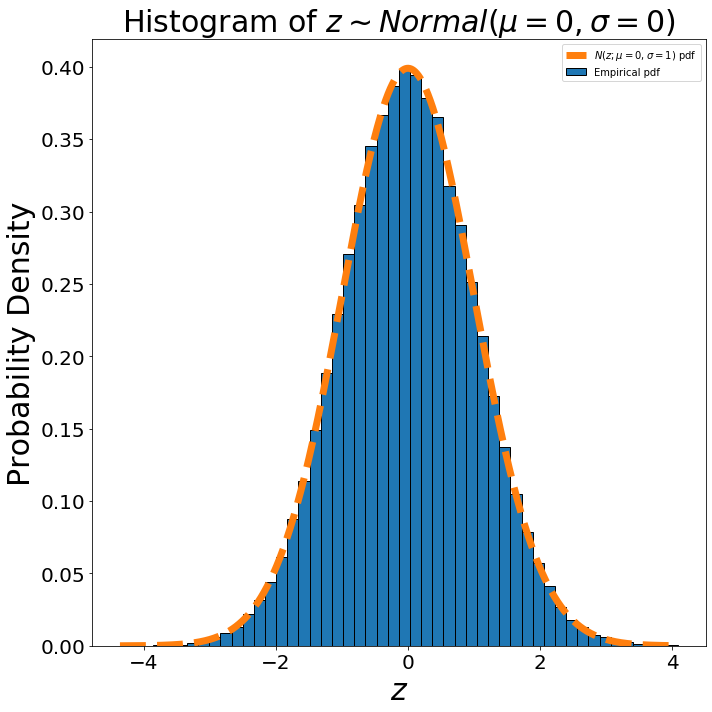

In [24]:
fig, ax = plt.subplots(figsize=(10,10))

# Here we don't capture any output from hist function
# label parameter is the label displayed in legend
ax.hist(z, num_bins, density=True, histtype='bar', ec='black', label="Empirical pdf")

# This is the only new piece of code: bell-shaped standard normal pdf-z is drawn here.
# On the x-axis we plot the uniform grid of z values
# On the y-axis we plot the corresponding values of the Standard Normal density function
# the dashed line is selected adding argument '--' 
# lw=7 sets the width of the line
# label parameter is the label displayed in legend
ax.plot(z_unif_grid, stdn_pdf_z, '--', lw=7, label="$N(z;\mu=0, \sigma=1)$ pdf")

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_xlabel('$z$', fontsize=30) 
ax.set_ylabel('Probability Density', fontsize=30) 

ax.set_title(r'Histogram of $z \sim Normal(\mu=0, \sigma=0)$', fontsize=30) 

# Here we add the legend
ax.legend(loc='upper right', ncol=1)

fig.tight_layout()
plt.show()

# 5. Normal Fit of the Distribution of the Extracted Values <a name="fit"></a>

### Normal fit

We first do a Normal fit to $z$. This means the following:

- we assume a normal density function as theoretical model for the probability density function $pdf(z)$ of $z$ 
$$
pdf(z) = N(z; \mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} \left( \frac{z - \mu}{\sigma} \right) ^2}
$$
- we find the mean $\hat{\mu}$ and standard deviation $\hat{\sigma}$ such that $N(z; \hat{\mu}, \hat{\sigma})$ best matches the empirical distribution of $z$ (i.e. the normalized histogram)  

To get $\hat{\mu}$ and $\hat{\sigma}$ we simply need to call the `fit` function defined in the `norm` class (a class for Normal random variables) of `scipy.stats`. More on classes and objects in a future lesson.

In [25]:
mu_hat, sigma_hat = stats.norm.fit(z) # get mean and standard deviation

In [26]:
mu_hat, sigma_hat

(0.0022515048620656945, 1.001399256630773)

As the $\hat{\mu}$ and $\hat{\sigma}$ fitted values suggest, empirical $z$ values roughly have zero mean and unit standard deviation.

### Higher moments: Skewness and Kurtosis

We now go one step further. We want to test whether, not only the first two moments, but the empirical distribution itself is compatible with the hypothesis that $z$ values are sampled from a Normal distribution. To do this, we consider higher moments: skewness and kurtosis.

For any random variable $Z$, if we denote the theoretical mean and standard deviation as $\mu = E[Z]$ and $\sigma = E[(Z- \mu)^2]$, respectively:

- Skewness $S$ is the third standardized moment of $Z$
$$
S(Z) = E \left[ \left( \frac{Z- \mu}{\sigma} \right)^3 \right]
$$
and measures the _asymmetry_ of the distribution of $Z$.

- Kurtosis $K$ is the fourth standardized moment of $Z$
$$
K(Z) = E \left[ \left( \frac{Z- \mu}{\sigma} \right)^4 \right]
$$
and measures the _tailedness_ of the distribution of $Z$. Notice how we distinguish between $Z$ random variable (capital letter) and $z$ values (lower case) extracted from the $pdf(z)$ of $Z$. 

For Normal random variables (that is, if $Z \sim pdf(z) = N(z; \mu, \sigma)$), it can be shown:
- $S(Z)=0$. This is intuitive, since the Gaussian bell is symmetrical around $\mu$;
- $K(Z)=3$. This is a result.

We can compute the empirical Skewness $\hat{S}$ and excess Kurtosis $\hat{K}-3$ from our sample of $z$ values as `stats.skew` and `stats.kurtosis` of `scipy`, respectively:

In [27]:
skew_hat = stats.skew(z)
skew_hat

0.01682179911154367

In [28]:
kurt_hat = stats.kurtosis(z) # this returns the sample excess kurtosis, that is sample kurtosis - 3
kurt_hat

0.0002920451221517517

Both values are reasonably in line with those expected for a normal distribution.

# 6. Jarque-Bera test for Normality <a name="JB"></a>

### Introduction

We test for normality using a [Jarque-Bera test](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test): a goodness-of-fit test of whether sample data have the [skewness](https://en.wikipedia.org/wiki/Skewness) and [kurtosis](https://en.wikipedia.org/wiki/Kurtosis) matching a normal distribution. That is the null-hypothesis (aka H$_0$) of a Jarque Bera test is

H$_0$: joint hypothesis of the skewness being zero ($S=0$) and the excess kurtosis being zero ($K-3=0$).

Jarque-Bera test statistics $\mathit {JB}$ is defined as: 
$$
{\displaystyle {\mathit {JB}}={\frac {N}{6}}\left(\hat{S}^{2}+{\frac {1}{4}}(\hat{K}-3)^{2}\right)}
$$
where $N$ is the number of observations, $\hat{S}$ and $\hat{K}$ are sample estimates of skewness and kurtosis, respectively.

The test statistic $\mathit {JB}$ is always nonnegative. If it is far from zero, it signals the data do not have a normal distribution.

### Python implementation

Jarque-Bera test is implemented in `stats.jarque_bera` function of `scipy`, returning:
- `JB`: the $\mathit {JB}$ test statistics;
- `JB_p_value`: the p-value $p$ for the H$_0$ hypothesis of normality.

In [29]:
JB, JB_p_value = stats.jarque_bera(z)

In [30]:
JB

4.716570798957913

This value is reasonably small so that we can expect our $z$ samples to be roughly normal.

### $\mathit{JB}$ replication

We can replicate the `JB` value returned by `stats.jarque_bera`:

In [31]:
JB_replicated = (N/6) * (skew_hat**2 + 0.25*kurt_hat**2)
JB_replicated

4.716570798957909

Due to rounding errors, the comparison cannot be exact...

In [32]:
JB_replicated == JB

False

...but only exact within an error epsilon at most $\epsilon = 10^{-14}$, which is btw surprisingly small anyway (`np.abs` returns the absolute value of its argument):

In [33]:
best_epsilon = 1e-14
np.abs(JB_replicated - JB) < best_epsilon

True

In [34]:
fail_epsilon = 1e-15 # fail_epsilon < best_epsilon
np.abs(JB_replicated - JB) < fail_epsilon

False

### p-value

To provide statistical significance to the conclusion that $z$ samples are normally distributed, we look at the p-value of the test. 

In [35]:
JB_p_value

0.0945822550304295

Since $p \approx 0.09 > \alpha = 0.05$, we conclude that the Normality hypothesis H$_0$ is not rejected with $\alpha = 5\%$  significance level. In other words this means that the probability of rejecting the null hypothesis H$_0$ given that it is true is at most $5\%$ (this probability is conventionally called [Type I error rate](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors#Error_rate)).

Observe that: having fixed the significance level $\alpha$ (typically $\alpha = 5\%$), looking at the p-value $p$ of the test, you: 
- reject H$_0$ if $p < \alpha$ 
- fail to reject H$_0$ if $p > \alpha$ (notice that you do not _accept_ H$_0$)

Usage of p-value of statistical tests can be found [here](https://en.wikipedia.org/wiki/P-value#Usage).